In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import nltk

# Logistic Regression


In [1]:
from google.colab import files
uploaded = files.upload()

Saving FinancialSentiment.csv to FinancialSentiment.csv


## Preprocessing


Upload headline and split into training set and testing set


In [44]:
sentiment = []
corpus = []
corpusTest = []
sentimentTest = []
i = 0

with open('FinancialSentiment.csv', 'rt', encoding = "ISO-8859-1") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row in csv_reader:
    if i > 4000:
        corpusTest.append(nltk.word_tokenize(row[1]))
        sentimentTest.append(row[0])
    else:
        corpus.append(nltk.word_tokenize(row[1]))
        sentiment.append(row[0])
        i = i+1

We stem each headline using a Porter stemmer

In [45]:
porter = PorterStemmer()
stemmedHeadlines = []
currHeadline = ""
for headline in corpus:
  for word in headline:
    currHeadline = currHeadline + (porter.stem(word)) + " "
  stemmedHeadlines.append(currHeadline)
  currHeadline = ""

porter = PorterStemmer()
stemmedTest = []
currHeadline = ""
for headline in corpusTest:
  for word in headline:
    currHeadline = currHeadline + (porter.stem(word)) + " "
  stemmedTest.append(currHeadline)
  currHeadline = ""

In [7]:
print(stemmedHeadlines[0])

accord to gran , the compani ha no plan to move all product to russia , although that is where the compani is grow . 


We make an occurance matrix and a TFIDF matrix

In [46]:
vectorizer = CountVectorizer(stop_words = 'english', min_df = 3)
xtrain = vectorizer.fit_transform(stemmedHeadlines).todense()
print("Occurance vocab len:" , len(vectorizer.vocabulary_))

Occurance vocab len: 2340


In [47]:
vectorizerTFIDF = TfidfVectorizer(stop_words = 'english', min_df = 3)
xtrainTFIDF = vectorizerTFIDF.fit_transform(stemmedHeadlines)
print("TFIDF Vocab len:" , len(vectorizer.vocabulary_))

TFIDF Vocab len: 2340


## Making the Model


We use a grid search to find the best parameters for the model


In [48]:
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    grid = GridSearchCV(LogisticRegression(max_iter = 20000), param_grid, cv=5)
    grid.fit(xtrain, sentiment)

    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.75
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Testing the Model


In [49]:
xtest = vectorizer.transform(stemmedTest)
lr = grid.best_estimator_
lr.fit(xtrain, sentiment)
lr.predict(xtest)
print("Score: {:.2f}".format(lr.score(xtest, sentimentTest)))

Score: 0.37


In [50]:
xtest = vectorizerTFIDF.transform(stemmedTest)
lr = grid.best_estimator_
lr.fit(xtrainTFIDF, sentiment)
lr.predict(xtest)
print("Score: {:.2f}".format(lr.score(xtest, sentimentTest)))

Score: 0.36


## Word Cloud


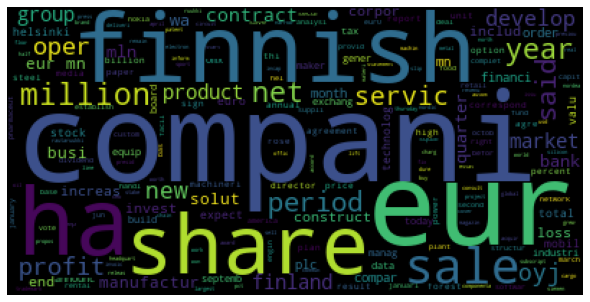

In [52]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

long_str = ""
for key in tfidfvectorizer.vocabulary_.keys():
  long_str = long_str + " " + key

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(long_str) 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(long_str)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 